<a href="https://colab.research.google.com/github/kmkarakaya/ML_tutorials/blob/master/AccuracyIsNotEnough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOW TO EVALUATE A CLASSIFIER *INCORRECTLY*? 

* WHY 99% **ACCURACY** IS ***NOT*** ENOUGH?
* WHY ACCURACY IS ***NOT*** A GOOD PERFORMANCE METRIC IN CLASSIFICATION TASKS?

* WHAT ABOUT **RECALL, PRECISION & F1**?

* HOW TO INTERPRET **ROC & AUC**?

* WHICH CLASSIFIER IS ***BETTER*** AMONG THE ALTERNATIVES?

# Sample Problem
* Assume that you have collected test data and test results for COVID-19 world-wide

* You know 20 features about all tested subject

* Test result **"0"** means that person **is healthy**

* Test result **"1"** means that person **is unfortunately COVID-19**

* Examine the results below figure


[**How many tests to find one COVID-19 case?**](https://ourworldindata.org/covid-testing#source-information-country-by-country)	

![Corona Tests per positive](https://github.com/kmkarakaya/ML_tutorials/blob/master/images/coronaTests.png?raw=true)


* What you can notice that the detecting a corona case per test has a **very low probability** changing from **0.005 to 0.14**. 

* Top 5 country average is (5/607) **0.008**! 

* That is, in our data set there woulld be  **99.2% "0"** and **0.8% "1"** as the test result.

# Goal
* Our goal is to select ***THE BEST*** Machine Learning algorithm **among 8 alternatives** to classsify samples in the data set as a ***positive corona*** case!





# What will we learn?
* how to **measure the performance** of a **binary** classifier
* how to **compare** the performances of classification algorithms
* which **metrics** are **meaningful** which is **useless**
* how to **interpret** the metric scores or graphics
* why "**accuracy**" is not a good metric
* why a **fixed thresold** value is **not** usefull

We will cover:
* Accuracy
* Recall
* Precision
* F1
* ROC
* ROC AUC
* predit()
* predict_proba()
* threshold

## NOTES:
* You can acess the notebook on  [COLAB](https://colab.research.google.com/drive/1Q9KPbgEXHbcJqUmsilPZntbtkGxSFdyA?usp=sharing), [GITHUB](https://github.com/kmkarakaya/ML_tutorials/blob/master/Anomaly_Detection_in_A_Time_Series.ipynb), or [Kaggle](https://www.kaggle.com/kmkarakaya/anomaly-detection-in-time-series-using-voting) 

* you can **watch** this notebook on <font color="red"> YOUTUBE </font> in [TURKISH](https://youtu.be/pJqt5hr4Hs4) or in [ENGLISH](https:) at [Murat Karakaya Akademi Channel](https://www.youtube.com/channel/UCrCxCxTFL2ytaDrDYrN4_eA)



* prepared by Murat Karakaya

# Import dependencies

In [0]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np 
import pandas as pd

# Function to create a random BINARY dataset with a specific class disributions
* We will use **make_classification()** with  **weights** parameter which is the proportions of samples assigned to each class. 

In [0]:
def makeDataset(size= 1000, negativeClassDistribution=0.5):
  print("Created a random binary dataset with class disributions:")
  # generate 2 class dataset
  X, y = make_classification(n_samples=size, n_classes=2, weights=[negativeClassDistribution], random_state=1)
  print( "class 0 (negative class): {:.2f}% vs class 1 (positive class): {:.2f}% ".format(len(y[y==0])/size*100, len(y[y==1])/size*100))
  print("X: ")
  print(pd.DataFrame(X).head())
  print("y: ")
  print(pd.DataFrame(y).head())
  
  # split into train/test sets
  return train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)


# Function to create Dummy Classifiers
* We will use **[DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)** which is a classifier that makes predictions using **simple rules**.

* This classifier is useful as a **simple baseline** to compare with other (real) classifiers. 

* **Do not use it for real problems**.



## Function Prototype

class sklearn.dummy.DummyClassifier( **strategy**='warn', random_state=None, **constant**=None)



## Parameters: **strategy** 

default=”stratified”. Strategy to use to generate predictions.

* **“stratified”**: generates **predictions** by respecting the training set’s **class distribution**.

* **“most_frequent”**: **always predicts** the **most frequent** label in the training set.

* **“prior”**: **always predicts** the class that **maximizes the class prior** (like “most_frequent”) and **predict_proba returns the class prior**.

* **“uniform”**: generates **predictions** uniformly at **random**.

* **“constant”**: always **predicts a constant label** that is provided by the user. This is useful for metrics that evaluate a non-majority class


In [0]:
def Dummy(strategy, ax=None, constant=0, showReport=False):
  # no skill model, stratified random class predictions
  model = DummyClassifier(strategy=strategy, constant=constant)
  model.fit(trainX, trainy)
  yhat = model.predict_proba(testX)


  label='DummyClassifier ('+str(strategy)+')'
  if (strategy=='constant'):    
    label=label+' '+str(constant)
  
  print(label)
  if showReport:
    print(classification_report(testy, model.predict(testX)))
  else:
    print("accuracy_score {:.2f}%".format(100*accuracy_score(testy, model.predict(testX))))
  
  if ax is not None:
    # retrieve just the probabilities for the positive class
    pos_probs = yhat[:, 1]
    # calculate roc auc
    roc_auc = roc_auc_score(testy, pos_probs)
    #print("testy, pos_probs: ", testy, pos_probs)

    # calculate roc curve for model
    fpr, tpr,threshold = roc_curve(testy, pos_probs)
    #print(" fpr, tpr, threshold", fpr, tpr, threshold)
    # plot model roc curve
    
    ax.set_title('{} ROC AUC {:.3f}'.format(label, roc_auc))  
    ax.plot(fpr, tpr, marker='.', label=label)
    # axis labels
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    # show the legend
    ax.legend()
  return ax


# Function to use KNN and Logistic Regression classifiers as skilful classifiers 


In [0]:
def SkilFul(model, ax=None,   showReport= False):
  # skilled model
  label=str(model)[:15]
  print("A skilled model: "+ label)
  model = model
  model.fit(trainX, trainy)
  yhat = model.predict_proba(testX)

  if showReport:
    print(classification_report(testy, model.predict(testX)))
  else:
    print("accuracy_score {:.2f}%".format(100*accuracy_score(testy, model.predict(testX))))

  if ax is not None:
    # retrieve just the probabilities for the positive class
    # The binary case expects a shape (n_samples,), and the scores must be the scores of  
    # the class with the greater label.
    pos_probs = yhat[:, 1]
    #print("yhat \n", yhat.shape)
    # calculate roc auc
    roc_auc = roc_auc_score(testy, pos_probs)
    #print('Logistic ROC AUC %.3f' % roc_auc)

    # calculate roc curve for model
    fpr, tpr, threshold = roc_curve(testy, pos_probs)
    #print(" fpr, tpr, threshold", fpr, tpr, threshold)
    # plot model roc curve
    ax.plot(fpr, tpr, marker='.', label=label)

    ax.set_title('{} ROC AUC {:.3f}'.format(label, roc_auc))  
    
    # axis labels
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    # show the legend
    ax.legend()
  return ax

# Create a data set for a given negative class distrubion

Created a random binary dataset with class disributions:
class 0 (negative class): 98.70% vs class 1 (positive class): 1.30% 
X: 
         0         1         2   ...        17        18        19
0 -0.620707  1.397695  0.103500  ... -0.344097  0.621977 -1.796452
1  0.905922  1.919975 -0.778371  ... -1.305605 -1.544768 -0.245321
2  0.279021  0.858877  1.207804  ...  2.503744 -0.164972 -1.959120
3 -0.478707 -0.429668 -0.033423  ...  0.035345  0.558878 -0.782533
4 -0.011143  0.108412  0.207492  ...  1.346155  1.006522 -0.969819

[5 rows x 20 columns]
y: 
   0
0  0
1  0
2  0
3  0
4  0
y histogram: 
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f983ba08860>]]


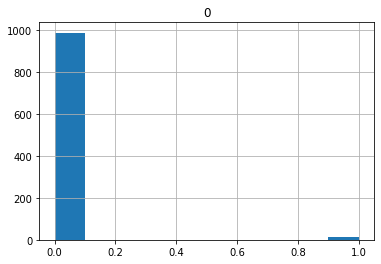

In [5]:
trainX, testX, trainy, testy = makeDataset(size= 2000, negativeClassDistribution = 0.992)
print("y histogram: ")
print(pd.DataFrame(testy).hist())

# Observe "Accuracy" score for all 8 classifiers

In [6]:
Dummy('stratified')
Dummy('most_frequent')
Dummy('prior')
Dummy('uniform')
Dummy('constant', constant=0)
Dummy('constant', constant=1)
SkilFul(model=LogisticRegression())
SkilFul(model=KNeighborsClassifier())

DummyClassifier (stratified)
accuracy_score 97.10%
DummyClassifier (most_frequent)
accuracy_score 98.70%
DummyClassifier (prior)
accuracy_score 98.70%
DummyClassifier (uniform)
accuracy_score 53.10%
DummyClassifier (constant) 0
accuracy_score 98.70%
DummyClassifier (constant) 1
accuracy_score 1.30%
A skilled model: LogisticRegress
accuracy_score 98.70%
A skilled model: KNeighborsClass
accuracy_score 98.70%


# Observe more metrics: Precision, Recal, F1 

In [7]:
Dummy('stratified',  showReport= True)
Dummy('most_frequent',  showReport= True)
Dummy('prior',  showReport= True)
Dummy('uniform',  showReport= True)
Dummy('constant',  constant=0, showReport= True)
Dummy('constant',  constant=1, showReport= True)
SkilFul(model=LogisticRegression(), showReport= True)
SkilFul(model=KNeighborsClassifier(), showReport= True)

DummyClassifier (stratified)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       987
           1       0.00      0.00      0.00        13

    accuracy                           0.97      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.97      0.97      0.97      1000

DummyClassifier (most_frequent)
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       987
           1       0.00      0.00      0.00        13

    accuracy                           0.99      1000
   macro avg       0.49      0.50      0.50      1000
weighted avg       0.97      0.99      0.98      1000

DummyClassifier (prior)
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       987
           1       0.00      0.00      0.00        13

    accuracy                           0.99      1000
   macro avg       0.49      0.50      0.50

# Observe Receiver Operator Curve (ROC) & Area Under Curve (AUC)

**Important Remiders**

* So far the **threshold** value is **fixed at 0.5** for deciding a class label
* That is  **class label** is decided as **"0"** if the **class probability** less than 0.5 
* **class label** is decided as **"1"** if the **class probability** greater than or equal to 0.5 
* **In ROC metric** we try a**ll possible thershold values** for class probabilities to decide class labels
* In ROC, for each possible threshold value we calculate TPR and FPR pairs and draw on a plot
* **Area Under Curve (AUC) score** gives an average performance of the classifier when all possible threshold values are considered



DummyClassifier (stratified)
accuracy_score 98.30%
DummyClassifier (most_frequent)
accuracy_score 98.70%
DummyClassifier (prior)
accuracy_score 98.70%
DummyClassifier (uniform)
accuracy_score 49.40%
DummyClassifier (constant) 0
accuracy_score 98.70%
DummyClassifier (constant) 1
accuracy_score 1.30%
A skilled model: LogisticRegress
accuracy_score 98.70%
A skilled model: KNeighborsClass
accuracy_score 98.70%


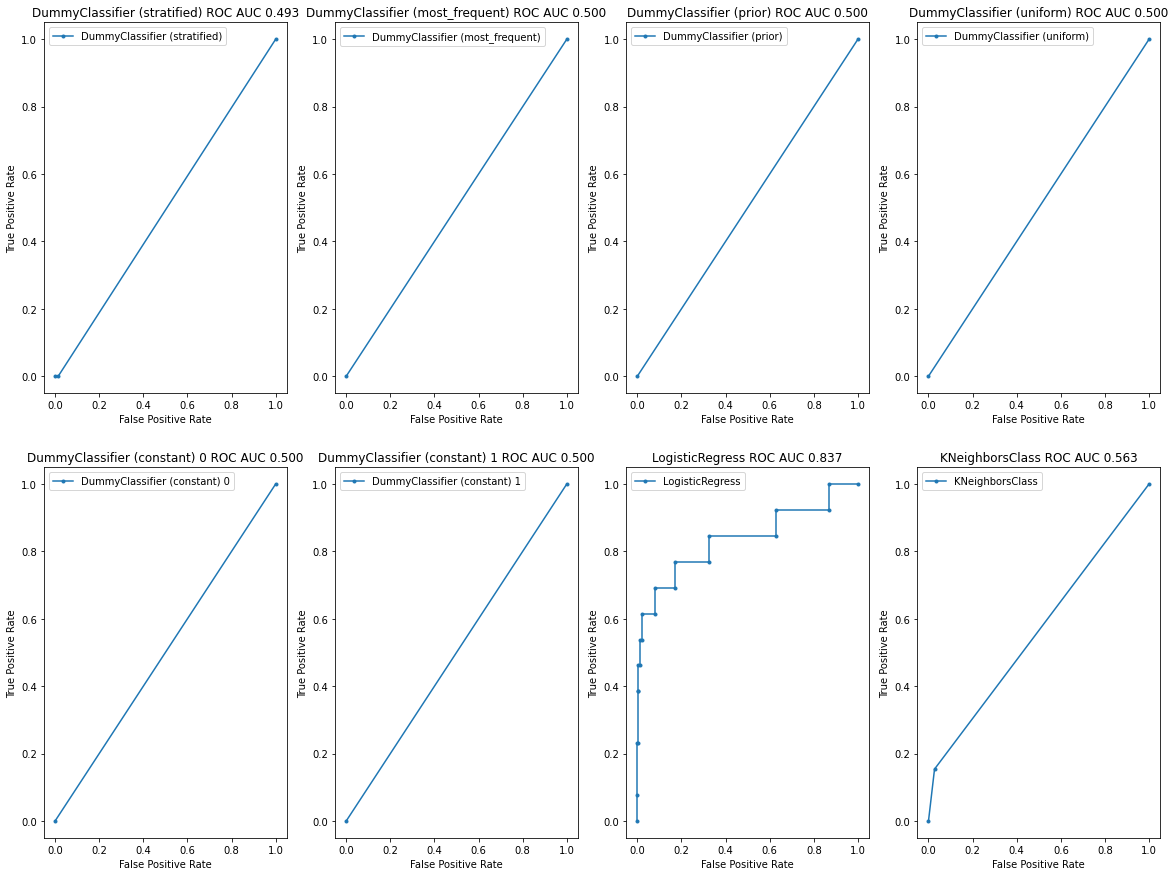

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 15))
Dummy('stratified', axes[0][0])
Dummy('most_frequent', axes[0][1])
Dummy('prior', axes[0][2])
Dummy('uniform', axes[0][3])
Dummy('constant', axes[1][0], constant=0)
Dummy('constant', axes[1][1], constant=1)
SkilFul(model=LogisticRegression(),ax=axes[1][2])
SkilFul(model=KNeighborsClassifier(),ax=axes[1][3])

plt.show()

# NOTE: THE WORTHLESS TEST
* When we have a complete overlap between the results from the positive and the results from the negative population, we have **a worthless test**. 

* A worthless test has a discriminating ability equal to **flipping a coin**.

* The ROC curve of the worthless test falls on the **diagonal line**. It includes the point with 50 % sensitivity and 50 % specificity. The area under the ROC curve (**ROC AUC**) of the worthless test is **0.5**.

# Categorization of ROC curves
* As a rule of thumb the categorizations in TABLE can be used to describe an ROC curve.

![Categorization of ROC curves](https://github.com/kmkarakaya/ML_tutorials/blob/master/images/TABLE%20IV%20Categorization%20of%20ROC%20curves.gif?raw=true)

# Conclusions

* Accuracy is **NOT** always a good metric for **classification**, esp. if there exists **class imbalanced** data set

* **Classification report** provides details of other metrics: **Precision, Recal and F1** with **avareging over classes** with respect to several metrics

* **However**, **Classification report**  provides results with different metrics for **only a fixed threshold value** which does not depict the whole performance of a classifier

* **ROC** graph is very useful to inspect the ML method **skilfulness** under **all possible threshold **values

* **ROC AUC score** is important to for **measuring the performance of a classifier** considering various thresholds

* If a classifier has a **ROC AUC around to 0.5** is **useless** even with a **99% accuracy**!

* Conduct a comprehensive **EDA** on the data to see if the **classes are balanced** 



# Improve yourself 
You can use **Precision-Recal Curve** to compare the model performances in inbalanced data sets


# Bonus: Threshold + Proba --> Class Label

A skilled model: LogisticRegress
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       987
           1       0.00      0.00      0.00        13

    accuracy                           0.99      1000
   macro avg       0.49      0.50      0.50      1000
weighted avg       0.97      0.99      0.98      1000

1000 tests considered to be POSITIVE when threshold is 0e+00 
25 tests considered to be POSITIVE when threshold is 0.1 
7 tests considered to be POSITIVE when threshold is 0.2 
3 tests considered to be POSITIVE when threshold is 0.3 
2 tests considered to be POSITIVE when threshold is 0.4 
0 tests considered to be POSITIVE when threshold is 0.5 
0 tests considered to be POSITIVE when threshold is 0.6 
0 tests considered to be POSITIVE when threshold is 0.7 
0 tests considered to be POSITIVE when threshold is 0.8 
0 tests considered to be POSITIVE when threshold is 0.9 
0 tests considered to be POSITIVE when threshold is 1e+00 


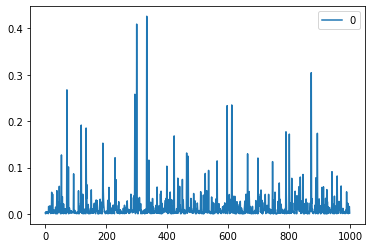

In [9]:
  model= LogisticRegression()
  label=str(model)[:15]
  print("A skilled model: "+ label)
  model = model
  model.fit(trainX, trainy)
  yhat = model.predict_proba(testX)

  print(classification_report(testy, model.predict(testX)))
 

  # retrieve just the probabilities for the positive class
  # The binary case expects a shape (n_samples,), and the scores must be the scores of  
  # the class with the greater label.
  pos_probs = yhat[:, 1]
  pd.DataFrame(pos_probs).plot()

  for threshold in np.linspace(0,1,11):
    print("{} tests considered to be POSITIVE when threshold is {:.1} ".format(len(pos_probs[pos_probs>=threshold]),threshold))